# 데이터 수집

In [1]:
pip install requests beautifulsoup4

In [2]:
pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 27.0 MB/s eta 0:00:00


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re

urls = [
    # 2025
    "https://www.yna.co.kr/view/AKR20250825074200004?site=mapping_related",
    "https://www.yna.co.kr/view/AKR20250908124200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814094400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250909175800051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250909118800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250825074200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250827075400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250918058900009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250916121200054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250916071200530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250912101400546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250807028851055?input=1195m",
    "https://www.yna.co.kr/view/AKR20250728042200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731082200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814094451065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250726043400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250911114800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250628017500007?input=1195m",
    "https://www.yna.co.kr/view/AKR20250912104900062?input=1195m",
    "https://www.yna.co.kr/view/PYH20250915195000062?input=1196m",
    "https://www.yna.co.kr/view/AKR20250516093800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20250523085300060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250522158152060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512055951004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250422086600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250312132200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20250228089900056?input=1195m",
    "https://www.yna.co.kr/view/AKR20250324150600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250215039900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250306106900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250907052900001?input=1195m",
    "https://www.yna.co.kr/view/AKR20250910164500530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250910005200371?input=1195m",
    "https://www.yna.co.kr/view/AKR20250126031000001?input=1195m",
    "https://www.yna.co.kr/view/AKR20250124107800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250901053300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250123132200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250122026000009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250906030600530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250904059800053?input=1195m",
    "https://www.yna.co.kr/view/AKR20250902076400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250425152200530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250901116300054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250829073400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731073200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241222008500009?input=1195m",
    "https://www.yna.co.kr/view/AKR20241217137800530?input=1195m",
    "https://www.yna.co.kr/view/AKR20241213110600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241119120100004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101129700530?input=1195m",
    "https://www.yna.co.kr/view/AKR20241123015000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106183100081?input=1195m",
    "https://www.yna.co.kr/view/AKR20241114092700004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241111091500065?input=1195m",
    "https://www.yna.co.kr/view/AKR20241112094200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241021128600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240930126500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927060400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927064500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250823026600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250828079200546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250822109700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250815032100530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250820107100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250808133200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814151700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250808086700057?input=1195m",
    "https://www.yna.co.kr/view/AKR20250804118800062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250726029400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731106200546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250711104300004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250729075800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250702070500051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250625144400051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250606035200005?input=1195m",
    "https://www.yna.co.kr/view/AKR20250605149400064?input=1195m",
    "https://www.yna.co.kr/view/AKR20250630098800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250617065900065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250627093400064?input=1195m",
    "https://www.yna.co.kr/view/AKR20250626122600061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250613121600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250620037151065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250620037100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250611054100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250618140000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250616065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250616065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250528078700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250513120800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250515111200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512082251061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250513138200061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250516106600054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512082200061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250416065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250502148200082?input=1195m",
    "https://www.yna.co.kr/view/AKR20250423109500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250324145300063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250311125000530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250328059800065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250321142600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250307112200062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250125006600075?input=1195m",
    "https://www.yna.co.kr/view/AKR20250113100400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20250104039900007?input=1195m",
    "https://www.yna.co.kr/view/AKR20241220140500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20250107133700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250107002400108?input=1195m",
    "https://www.yna.co.kr/view/AKR20241129051400062?input=1195m",
    # 2024
    "https://www.yna.co.kr/view/AKR20240913064600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240823130300081?input=1195m",
    "https://www.yna.co.kr/view/AKR20240827149200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726147400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240708115100530?input=1195m",
    "https://www.yna.co.kr/view/AKR20240712064300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240531092751007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240605077451007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240531092700007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240423109400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412104500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240119132900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241203071900530?input=1195m",
    "https://www.yna.co.kr/view/AKR20240112045800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240222096300017?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101078500546?input=1195m",
    "https://www.yna.co.kr/view/AKR20241120136400060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106009800075?input=1195m",
    "https://www.yna.co.kr/view/AKR20241119150200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241115111900064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106063400051?input=1195m",
    "https://www.yna.co.kr/view/AKR20241102044900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028134100064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241031144000053?input=1195m",
    "https://www.yna.co.kr/view/AKR20241108066300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241107031600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241025107000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241022079300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101027600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241026045200064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028136000057?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028065100060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241019038800063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240913141400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240924107600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241021135700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240924151600088?input=1195m",
    "https://www.yna.co.kr/view/AKR20241002061000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927120800052?input=1195m",
    "https://www.yna.co.kr/view/AKR20240922049500061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240911063500060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240816109000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240827051400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240816090400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240813131700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240830072600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726104400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240712114800065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240807143500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240806043651004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240719064400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240701130500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726051100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240709068700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240618096900009?input=1195m",
    "https://www.yna.co.kr/view/AKR20240629022000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240705068200062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240626124300054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240528142800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240528123200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240613082200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240611059800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240524132400054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240605089700055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240601004900075?input=1195m",
    "https://www.yna.co.kr/view/AKR20240424027000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412138800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412086200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412101400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240329097500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240329096800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240404072900056?input=1195m",
    "https://www.yna.co.kr/view/AKR20240119126500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240403152900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240402121200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240326083400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240326038400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240325135800064?input=1195m",
    "https://www.yna.co.kr/view/AKR20240322139900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240321116500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240319120200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20240229090200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240202078600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240222042900063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240126072000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240202064000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240207064200055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240130052700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240116111200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240123061900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240118110651051?input=1195m",
    # 2023
    "https://www.yna.co.kr/view/AKR20231227000700085?input=1195m",
    "https://www.yna.co.kr/view/AKR20231115154000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20231013063200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20231221092900063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230921104700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230920047000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230915133600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231221178500081?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912113400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230905111300007?input=1195m",
    "https://www.yna.co.kr/view/AKR20230725159600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231222065300704?input=1195m",
    "https://www.yna.co.kr/view/AKR20230618027100004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230703148600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231214021700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230627122500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230621050051054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230607102500054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230526103300057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230421118600530?input=1195m",
    "https://www.yna.co.kr/view/AKR20230510095200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230414093600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231214087100051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230417127400009?input=1195m",
    "https://www.yna.co.kr/view/AKR20230411119500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230320125400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230410078400056?input=1195m",
    "https://www.yna.co.kr/view/AKR20230217123000057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230125042200007?input=1195m",
    "https://www.yna.co.kr/view/AKR20231215148000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230608123100052?input=1195m",
    "https://www.yna.co.kr/view/AKR20231211028300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20231208054500057?input=1195m",
    "https://www.yna.co.kr/view/AKR20231205072800054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230330105000065?input=1195m",
    "https://www.yna.co.kr/view/AKR20231204104900054?input=1195m",
    "https://www.yna.co.kr/view/AKR20231124094100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231128052500060?input=1195m",
    "https://www.yna.co.kr/view/AKR20231103103100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231117133900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231109122200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20231114106400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231103108400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20231109122200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20231031156500051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230922039500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231011059100065?input=1195m",
    "https://www.yna.co.kr/view/PYH20231017213800013?input=1196m",
    "https://www.yna.co.kr/view/AKR20231014029000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230919043851065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912060551055?input=1195m",
    "https://www.yna.co.kr/view/AKR20230831107400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912056600064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230911020800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230905148400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230906107800064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230814040800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20230901076100051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230825053500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230823077200055?input=1195m",
    "https://www.yna.co.kr/view/AKR20230821151700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230720120800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20230727160100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230808134600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230724093700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230727050900053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230717102700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230630163600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230628172600064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230705081700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230528030551004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230621050000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230615158000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230519142300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230526074351063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230524120700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230518130000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230420096651063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230426036400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230331157100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230329060200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230419120600054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230418105200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230316043500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230328122600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120124600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120144400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230127083900052?input=1195m",
    "https://www.yna.co.kr/view/AKR20230209034600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230202123100054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230113064500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120120900065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230102063100056?input=1195m",
    # 2022
    "https://www.yna.co.kr/view/AKR20221115138700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221006157700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221005145151063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221005145100063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221006085651063?input=1195m",
    "https://www.yna.co.kr/view/AKR20220703030300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20220516113900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20220420112600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220205034800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20220217098200056?input=1195m",
    "https://www.yna.co.kr/view/AKR20221210024100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221214079200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221109104100057?input=1195m",
    "https://www.yna.co.kr/view/AKR20221025022600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221018115451054?input=1195m",
    "https://www.yna.co.kr/view/AKR20221020109300065?input=1195m",
    "https://www.yna.co.kr/view/AKR20221027124900054?input=1195m",
    "https://www.yna.co.kr/view/AKR20221012075500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221024147100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221014027300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220929129000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220927060300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220903031200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20220902111500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220720104600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220713111900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220616170200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220610095400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220419159100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220221112700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220324116100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220214119000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220214119000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220103114700004?input=1195m",
    # 2021
    "https://www.yna.co.kr/view/AKR20211123048300065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211123022300072?input=1195m",
    "https://www.yna.co.kr/view/AKR20211124026400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211227021500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20211112084600056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211112095000052?input=1195m",
    "https://www.yna.co.kr/view/AKR20211106045800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211005077800057?input=1195m",
    "https://www.yna.co.kr/view/AKR20210922036400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20210908136500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210825050900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210707177900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20211008148300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20211219044200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211221165900077?input=1195m",
    "https://www.yna.co.kr/view/AKR20210410028900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20210314051500061?input=1195m",
    "https://www.yna.co.kr/view/AKR20210210094400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20210114148600052?input=1195m",
    "https://www.yna.co.kr/view/AKR20211217044700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211105075400056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211108079300009?input=1195m",
    "https://www.yna.co.kr/view/AKR20211028164500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20211021137000065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211018113100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211108034400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211102116000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210910018000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210730048200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210806065200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210720061151056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210720124100056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210608095800062?input=1195m",
    "https://www.yna.co.kr/view/AKR20210417031700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20210406013000087?input=1195m",
    "https://www.yna.co.kr/view/AKR20210411027400009?input=1195m",
    "https://www.yna.co.kr/view/AKR20210225080600056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210222041800057?input=1195m",
    "https://www.yna.co.kr/view/AKR20210311155800055?input=1195m",
    "https://www.yna.co.kr/view/AKR20210128086800055?input=1195m",
    "https://www.yna.co.kr/view/AKR20210129158700062?input=1195m",
    "https://www.yna.co.kr/view/AKR20210104171551061?input=1195m",
]


def extract_article_data(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                      "AppleWebKit/537.36 (KHTML, like Gecko) "
                      "Chrome/120.0.0.0 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        # ✅ 제목 추출
        title_element = soup.select_one(
            ".content90 h1, .article-wrap01 h1, .story-news h1, "
            "h1.tit, h1.tit-title, .article-tit, .title01"
        )
        title = title_element.get_text(strip=True) if title_element else "제목 요소를 찾을 수 없습니다."

        # 🔁 메타 태그 백업
        if title == "제목 요소를 찾을 수 없습니다.":
            meta_title = soup.find("meta", property="og:title")
            if meta_title and meta_title.get("content"):
                title = meta_title["content"]

        # ✅ 본문 추출
        paragraphs = []
        for p in soup.select("#articleWrap p"):
            text = p.get_text(" ", strip=True)
            if any(kw in text for kw in ["제작", "일러스트", "저작권자", "연합뉴스", "@", "송고"]):
                continue
            if len(text) < 10:
                continue
            paragraphs.append(text)
        content = " ".join(paragraphs)
        if "세 줄 요약" in content:
            content = content.split("세 줄 요약", 1)[-1]

        # ✅ 연도 추출 (URL에서 4자리 숫자 찾기)
        year_match = re.search(r"AKR(20\d{2})", url)
        year = int(year_match.group(1)) if year_match else None

        # ✅ 언론사 컬럼 고정
        press = "연합뉴스"

        return {
            "year": year,
            "press": press,
            "title": title,
            "content": content,
            "url": url
        }

    except Exception as e:
        print(f"⚠️ {url} 오류: {e}")
        return None


# ✅ 실행
article_data = []
for url in tqdm(urls, desc="📡 연합뉴스 기사 수집 중..."):
    data = extract_article_data(url)
    if data:
        article_data.append(data)

# ✅ DataFrame 변환
df = pd.DataFrame(article_data)

# ✅ 저장
df.to_csv("yonhap_domestic_violence_with_year.csv", index=False, encoding="utf-8-sig")

display(df.head())
print(f"\n✅ 총 {len(df)}개 기사 수집 완료 (연도+언론사 컬럼 포함)")


📡 연합뉴스 기사 수집 중...: 100%|██████████| 369/369 [06:26<00:00,  1.05s/it]


,year,press,title,content,url
0,2025.0,연합뉴스,"올해 살인범죄 388건 중 70건, 가정폭력·교제폭력·스토킹 전력",경찰청은 올해 1∼7월 살인범죄(미수 포함) 사건 388건을 전수조사해 과거 신고 ...,https://www.yna.co.kr/view/AKR2025082507420000...
1,2025.0,연합뉴스,"프로야구 선수 출신 부산 조폭, 가정폭력 혐의 구속영장",부산경찰청 형사기동대는 가정폭력 범죄의 처벌 등에 관한 특례법 위반 혐의로 A씨 구...,https://www.yna.co.kr/view/AKR2025090812420005...
2,2025.0,연합뉴스,"40대 배우, 자택서 아내 폭행으로 가정폭력 신고당해",14일 경찰에 따르면 지난달 24일 오후 경기도 부천시 자택에서 40대 배우 A씨가...,https://www.yna.co.kr/view/AKR2025081409440006...
3,2025.0,연합뉴스,"야구선수 출신 조폭 BJ, 출소 한 달 만에 가정폭력으로 구속",9일 부산경찰청에 따르면 부산지법은 폭력행위 등 처벌에 관한 법률 위반(상해재범) ...,https://www.yna.co.kr/view/AKR2025090917580005...
4,2025.0,연합뉴스,"트럼프 ""워싱턴DC 범죄 줄었다"" 과시하다 '가정폭력 경시' 발언",8일(현지시간) 미국 일간 뉴욕타임스(NYT)에 따르면 트럼프 대통령은 이날 워싱턴...,https://www.yna.co.kr/view/AKR2025090911880000...



✅ 총 369개 기사 수집 완료 (연도+언론사 컬럼 포함)


# [1단계] BERTopic 기반 토픽 모델링 코드

In [4]:
# ✅ KoNLPy 사용을 위한 Java 설치 (필수)
!apt-get update -q
!apt-get install -y openjdk-11-jdk

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,196 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main 

In [5]:
# ============================================================
# ✅ [1단계] 환경 설정 (Java + 필수 라이브러리 설치)
# ============================================================
!apt-get update -q
!apt-get install -y openjdk-11-jdk

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += os.pathsep + os.path.join(os.environ["JAVA_HOME"], "bin")

!pip install -q bertopic konlpy sentence-transformers umap-learn

# ============================================================
# ✅ [2단계] 데이터 불러오기 및 전처리
# ============================================================
import pandas as pd
from konlpy.tag import Okt

# ⚠️ CSV 파일 경로 확인
df = pd.read_csv("yonhap_domestic_violence_with_year.csv")

# ✅ 결측치 및 짧은 기사 제거
df = df[df["content"].notna()]
df = df[df["content"].str.len() > 30]
texts = df["content"].tolist()

# ============================================================
# ✅ [3단계] 형태소 분석 + 불용어 제거
# ============================================================
okt = Okt()

# ✅ 불용어 사전 정의
stopwords = set([
    "a씨", "a씨는", "a씨를", "a씨의", "b씨", "b씨는", "b씨를", "b씨의",
    "씨", "씨는", "씨를", "씨의",
    "지난", "지난해", "같은", "여러", "당시", "오전", "오후", "그는",
    "경찰은", "밝혔다", "따르면", "했다", "했다며", "함께", "기소된",
    "재판부는", "대해", "관련", "통해", "이유로", "위해", "으로", "대한",
    "있다", "없는", "것으로", "하는", "에서", "으로", "하며", "에게",
    "에서는", "됐다", "되었다", "이", "그", "저", "또", "및", "등",
    "중", "은", "는", "이", "가", "의", "하다", "됐다", "되며", "되고",
    "됐다며", "것", "로", "을", "를", "말했다", "설명했다", "형사", "판사"
])

def preprocess_text(text):
    tokens = okt.pos(text, stem=True)
    filtered = [
        word for word, pos in tokens
        if pos in ["Noun", "Adjective"] and len(word) > 1 and word not in stopwords
    ]
    return " ".join(filtered)

texts_cleaned = [preprocess_text(t) for t in texts]
print(f"✅ 전처리 완료: {len(texts_cleaned)}개 기사 분석 준비됨")

# ============================================================
# ✅ [4단계] BERTopic 학습
# ============================================================
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("jhgan/ko-sroberta-multitask")

topic_model = BERTopic(
    embedding_model=embedding_model,
    top_n_words=10,
    min_topic_size=10,
    language="multilingual"
)

topics, probs = topic_model.fit_transform(texts_cleaned)

# ============================================================
# ✅ [5단계] 토픽 요약 및 결과 저장
# ============================================================
topic_info = topic_model.get_topic_info()
print("🟩 [토픽 요약]\n", topic_info.head())

df["topic"] = topics
df.to_csv("yonhap_topic_modeling.csv", index=False, encoding="utf-8-sig")
print("💾 'yonhap_topic_modeling.csv' 파일 저장 완료!")

# ============================================================
# ✅ [6단계] 시각화 (안정화 버전)
# ============================================================
from umap import UMAP

num_topics = len(topic_info)
umap_n_neighbors = min(5, num_topics - 1) if num_topics > 1 else 1

topic_model.umap_model = UMAP(
    n_neighbors=umap_n_neighbors,
    n_components=2,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

if num_topics > 1:
    try:
        fig1 = topic_model.visualize_topics()
        fig1.show()
    except Exception as e:
        print(f"⚠️ 토픽 분포 시각화 오류: {e}")
else:
    print("⚠️ 토픽 수가 2개 이하이므로 시각화 생략.")

fig2 = topic_model.visualize_barchart(top_n_topics=10)
fig2.show()

if num_topics > 1:
    try:
        fig3 = topic_model.visualize_heatmap()
        fig3.show()
    except Exception as e:
        print(f"⚠️ 히트맵 시각화 오류: {e}")

# ============================================================
# ✅ [7단계] 토픽별 대표 기사 예시 출력
# ============================================================
for topic_id in topic_info["Topic"].head(5):
    topic_name = topic_info.loc[topic_info["Topic"] == topic_id, "Name"].values[0]
    print(f"\n🟦 [토픽 {topic_id}] {topic_name}")
    representative_docs = topic_model.get_representative_docs(topic_id)
    if representative_docs:
        print("\n".join(representative_docs))
    else:
        print("대표 기사를 찾을 수 없습니다.")


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lis

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:03, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

🟩 [토픽 요약]
    Topic  Count              Name  \
0     -1     81   -1_경찰_신고_없다_피해자   
1      0     89    0_범행_혐의_재판_피해자   
2      1     80     1_경찰_신고_조사_혐의   
3      2     58     2_혐의_재판_선고_아내   
4      3     35  3_폭력_신고_가정폭력_피해자   

                                 Representation  \
0   [경찰, 신고, 없다, 피해자, 폭력, 아이, 혐의, 가정폭력, 사람, 때문]   
1    [범행, 혐의, 재판, 피해자, 피고인, 선고, 징역, 흉기, 살해, 기소]   
2   [경찰, 신고, 조사, 혐의, 경찰서, 체포, 사건, 출동, 가정폭력, 범행]   
3     [혐의, 재판, 선고, 아내, 폭행, 지법, 피고인, 춘천, 이유, 징역]   
4  [폭력, 신고, 가정폭력, 피해자, 경찰, 범죄, 의원, 교제, 경우, 경찰청]   

                                 Representative_Docs  
0  [충남 서산 경찰서 서산시 동문동 거리 아내 흉기 혐의 검거 흉기 차례 아내 병원 ...  
1  [대전 서산 지청 특정 범죄 가중 처벌 보복 살인 혐의 기소 사건 전날 양형 부당 ...  
2  [인천 경찰서 살인 혐의 구속영장 신청 전날 인천 부평구 자택 현관 아내 흉기 차례...  
3  [춘천 지법 단독 김택성 부장 가정폭력 범죄 처벌 특례법 위반 특수 폭행 혐의 기소...  
4  [경찰청 올해 살인 범죄 미수 포함 사건 사해 과거 신고 수사 이력 확인 결과 공개...  
💾 'yonhap_topic_modeling.csv' 파일 저장 완료!



🟦 [토픽 -1] -1_경찰_신고_없다_피해자
충남 서산 경찰서 서산시 동문동 거리 아내 흉기 혐의 검거 흉기 차례 아내 병원 사건 목격 시민 신고 현장 경찰 조사 취한 상태 아무 기억 진술 아내 지난달 차례 경찰 가정폭력 신고 신고 접수 지난달 이후 경찰 아내 분리 조치 그렇다 아내 상해 경찰 법원 피해자 보호 명령 신청 승인 통상 가정폭력 가해자 피해자 보호 명령 피해자 로부터 거리 이내 접근 통신 접근 금지 당하다 가정폭력 가해자 피해자 접근 실시간 방법 없다 현실 사건 당일 불시 아내 운영 가게 같다 범행 경찰 출석요구서 가정폭력 혐의 조사 일로 아내 보호 명령 이후 경찰 스마트워치 사건 당일 착용 경찰 가정폭력 신고 대응 문제 없다 가해자 피해자 분리 조치 조치 취했다 입장 경찰 관계자 경찰 대로 최선 이렇다 매우 안타깝다 유감 명의 피해자 노력 이번 사례 경찰 어떻다 없다 법적 한계 아쉬움 단체 전문가 가정폭력 범죄 법적 제도 시스템 미흡하다 지적 손정아 여성인권 티움 소장 피해자 가해자 강력하다 분리 조치 가해자 강력하다 처벌 면서 경찰 로서 모든 현재 제도 피해자 계속 양산 없다 구조
한국 데이트 폭력 연구소 촬영 교제 폭력 생활 통제 정서 폭력 내용 교제 폭력 가해자 심각하다 수준 모든 욕설 면서 연인 동안 전화 문자 메시지 욕설 사람 욕설 문자 하루 기본 기도 면서 부재 전화 피해자 생활 마비 소장 이렇다 생활 통제 정서 폭력 분명하다 면서 연인 사과 용서 빌어 이별 과정 때문 가족 친구 알리 전문가 상담 좋다 면서 생활 통제 정서 폭력 단계 살인 포함 물리 폭력 당하다 수도 인천 성장하다 소장 대학 학부 심리학 공부 대학원 임상심리학 박사 학위 한국 청소년 자살 예방 협회 창립 정서 힘드다 청소년 한국 데이트 폭력 연구소 교제 폭력 고통 사람 대상 상담 지원 고향 어디 인천 세상 외할머니 데리 외갓집 인천 외갓집 어머니 우울증 사흘 진통 출산 병약하다 상태 산후 우울증 할머니 어머니 건강 회복하다 데리 기간 성장기 전체 남동생 부모님 성장

# [2단계] 감성 분석 (긍정/부정/중립)

In [6]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.0 MB/s eta 0:00:00


config.json:   0%|          | 0.00/895 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/711M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


🧠 감성 분석 진행 중...
💾 저장 완료 → yonhap_sentiment_results.csv

📊 토픽별 감성 분포:


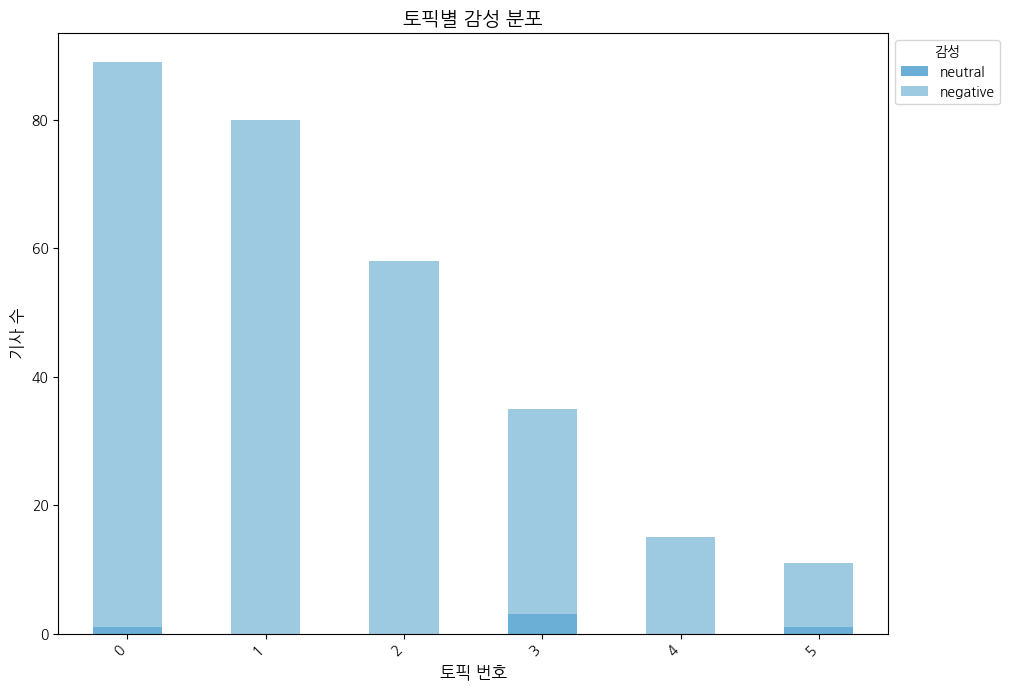


📊 전체 기사 감성 비율:
sentiment
negative    0.97832
neutral     0.02168
Name: proportion, dtype: float64


In [7]:
# ============================================================
# 1️⃣ 라이브러리 설치 및 불러오기
# ============================================================
!pip install transformers torch pandas matplotlib konlpy --quiet

import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# ============================================================
# 2️⃣ 감성 분석 파이프라인 (공개된 한국어 감성 모델)
# ============================================================
sentiment_analyzer = pipeline(
    "text-classification",
    model="WhitePeak/bert-base-cased-Korean-sentiment",  # ✅ 공개 모델 사용
    tokenizer="WhitePeak/bert-base-cased-Korean-sentiment",
    truncation=True,
    max_length=512
)

# ============================================================
# 3️⃣ 긴 문장 분할 및 감성 분석 함수
# ============================================================
def chunk_text(text, max_length=400):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return []
    sentences = text.replace('\n',' ').split("다.")
    chunks, chunk = [], ""
    for s in sentences:
        s = s.strip()
        if not s:
            continue
        if len(chunk + s + "다.") > max_length and chunk:
            chunks.append(chunk + "다.")
            chunk = s
        else:
            chunk += s + "다."
    if chunk.strip():
        chunks.append(chunk.strip())
    return chunks

def analyze_long_text(text):
    chunks = chunk_text(text)
    if not chunks:
        return {"sentiment":"neutral","confidence":0.5}
    try:
        results = sentiment_analyzer(chunks)
        pos = sum(1 for r in results if "LABEL_1" in r["label"] or "positive" in r["label"].lower())
        neg = sum(1 for r in results if "LABEL_0" in r["label"] or "negative" in r["label"].lower())
        total = pos + neg
        if total == 0:
            return {"sentiment":"neutral","confidence":0.5}
        if pos > neg:
            sentiment = "positive"
        elif neg > pos:
            sentiment = "negative"
        else:
            sentiment = "neutral"
        confidence = round(abs(pos-neg)/total,3)
        return {"sentiment": sentiment, "confidence": confidence}
    except Exception as e:
        print(f"⚠️ 감성 분석 실패: {e}")
        return {"sentiment":"neutral","confidence":0.5}

# ============================================================
# 4️⃣ 부정 키워드 기반 자동 교정 함수
# ============================================================
def keyword_adjustment(text, sentiment):
    negative_keywords = [
        "폭행","살인","혐의","사망","체포","피해자",
        "가정폭력","범죄","징역","고소","재판","처벌",
        "구속","상해","부상","위협","협박","흉기"
    ]
    score = sum(text.count(k) for k in negative_keywords)
    if score >= 5 and sentiment == "positive":
        return "negative"
    return sentiment

# ============================================================
# 5️⃣ 데이터 로드 및 전처리
# ============================================================
df = pd.read_csv("yonhap_topic_modeling.csv")
df = df[df["content"].notna()]
df = df[df["content"].str.strip()!=""]
df = df[df["content"].str.len() > 30]
sample_df = df.copy()

# ============================================================
# 6️⃣ 감성 분석 실행
# ============================================================
print("🧠 감성 분석 진행 중...")
sentiment_results = sample_df["content"].apply(analyze_long_text).tolist()
sentiment_df = pd.DataFrame(sentiment_results)
result_df = pd.concat([sample_df.reset_index(drop=True), sentiment_df], axis=1)

# 키워드 기반 보정
result_df["sentiment"] = result_df.apply(lambda x: keyword_adjustment(x["content"], x["sentiment"]), axis=1)

# ============================================================
# 7️⃣ 결과 저장
# ============================================================
result_df.to_csv("yonhap_sentiment_results.csv", index=False, encoding="utf-8-sig")
print("💾 저장 완료 → yonhap_sentiment_results.csv")

# ============================================================
# 8️⃣ 토픽별 감성 분포 시각화
# ============================================================
print("\n📊 토픽별 감성 분포:")
topic_sentiment = (
    result_df[result_df['topic'] != -1]
    .groupby(["topic", "sentiment"])
    .size()
    .unstack(fill_value=0)
)
sentiment_order = ['positive','neutral','negative']
sentiment_order_present = [s for s in sentiment_order if s in topic_sentiment.columns]
topic_sentiment = topic_sentiment[sentiment_order_present]
topic_sentiment.plot(
    kind="bar", stacked=True, figsize=(12,7),
    color=["#6BAED6","#9ECAE1","#FC9272"]
)
plt.title("토픽별 감성 분포", fontsize=14)
plt.xlabel("토픽 번호", fontsize=12)
plt.ylabel("기사 수", fontsize=12)
plt.legend(title="감성", loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0,0,0.85,1])
plt.show()

# ============================================================
# 9️⃣ 전체 감성 비율 출력
# ============================================================
print("\n📊 전체 기사 감성 비율:")
print(result_df["sentiment"].value_counts(normalize=True))


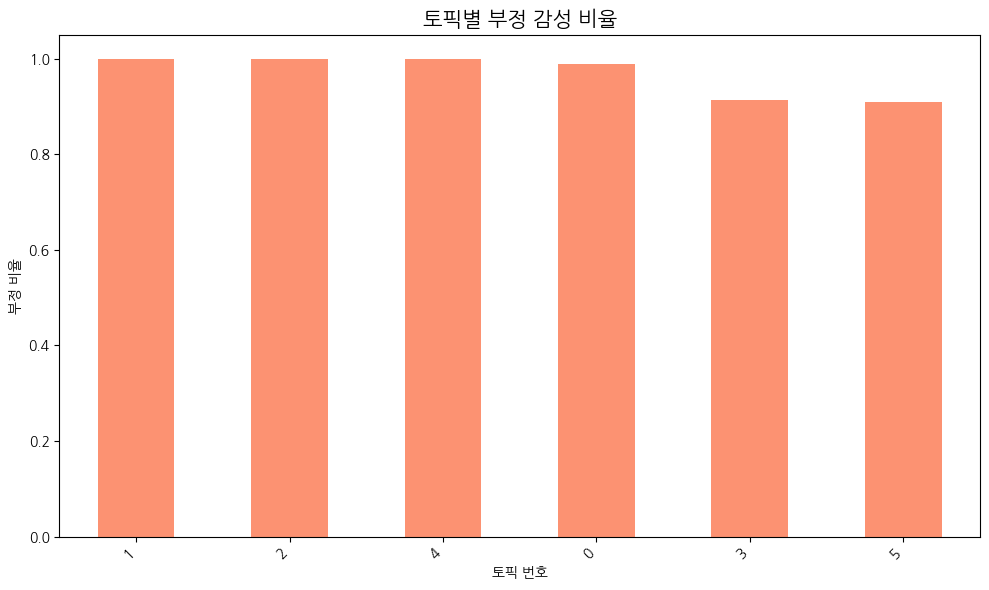

In [8]:
# 토픽별 부정 비율 시각화
negative_ratio = (
    result_df[result_df['topic'] != -1]
    .groupby('topic')['sentiment']
    .apply(lambda x: (x == 'negative').mean())
    .sort_values(ascending=False)
)

negative_ratio.plot(kind='bar', figsize=(10,6), color='#FC9272')
plt.title("토픽별 부정 감성 비율", fontsize=15)
plt.ylabel("부정 비율")
plt.xlabel("토픽 번호")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


| 토픽    | 주요 키워드    | 감성 해석                        |
| ----- | --------- | ---------------------------- |
| **0** | 혐의·재판·범행  | 범죄자 처벌 중심의 사법 보도 → 강한 부정적 서술 |
| **1** | 경찰·신고·혐의  | 수사 및 신고 관련 사건 중심 → 부정 감성 강세  |
| **2** | 폭력·피해자·교제 | 피해자 중심 기사 → 사회적 경각심 유발하는 서술  |


# [3단계] 키워드 시각화 (TF-IDF + WordCloud)

혐의      687
경찰      647
피해자     529
범행      480
가정폭력    471
신고      423
재판      385
아내      342
선고      328
사건      314
폭행      298
폭력      297
조사      271
피고인     266
징역      243
처벌      227
흉기      220
판사      217
이유      215
범죄      207
형사      199
기소      197
차례      187
살해      181
남편      179
보호      171
상태      171
아들      169
살인      167
명령      165
dtype: int64


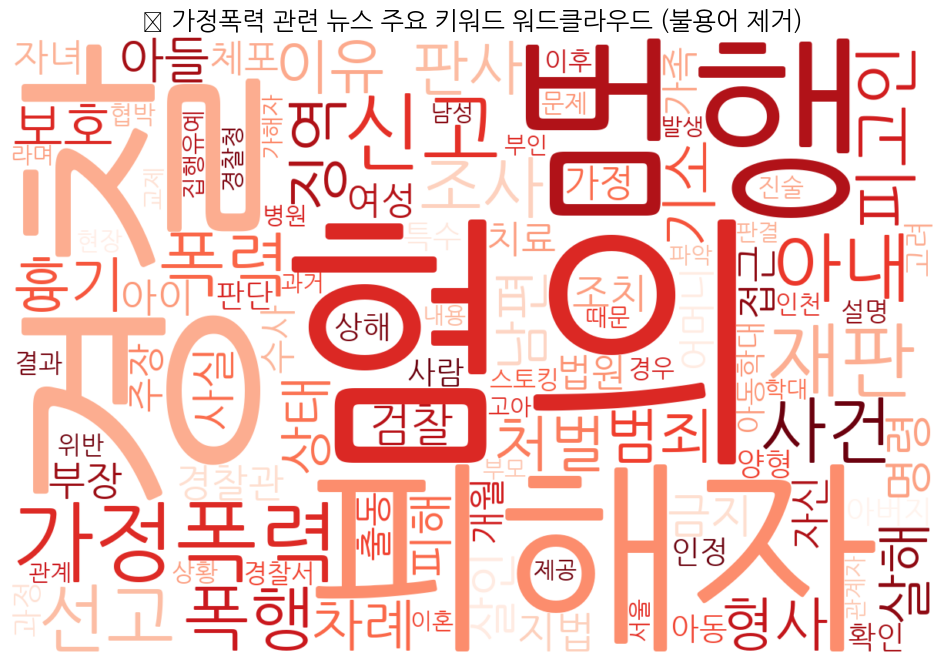

In [9]:
# ============================================================
# ✅ 1️⃣ 라이브러리 설치 및 불러오기
# ============================================================
!pip install konlpy wordcloud scikit-learn matplotlib --quiet
!apt-get -qq install fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

# ============================================================
# ✅ 2️⃣ 데이터 불러오기
# ============================================================
df = pd.read_csv("yonhap_sentiment_results.csv")

# ============================================================
# ✅ 3️⃣ 형태소 분석기 설정
# ============================================================
okt = Okt()

# ============================================================
# ✅ 4️⃣ 불용어 리스트 정의
# ============================================================
stopwords = set([
    "a씨", "a씨는", "a씨를", "a씨의", "b씨", "b씨는", "b씨를", "b씨의",
    "씨", "씨는", "씨를", "씨의",
    "지난", "지난해", "같은", "여러", "당시", "오전", "오후", "그는", "경찰은",
    "말했다", "밝혔다", "따르면", "했다", "했다며", "함께", "기소된", "재판부는",
    "대해", "관련", "통해", "이유로", "위해", "으로", "대한", "있다", "없는",
    "것으로", "하는", "에서", "으로", "하며", "에게", "에서는", "됐다", "되었다",
    "이", "그", "저", "또", "및", "등", "중", "은", "는", "이", "가", "의",
    "하다", "됐다", "되며", "되고", "됐다", "됐다며", "것", "로", "을", "를"
])

# ============================================================
# ✅ 5️⃣ 명사 추출 + 불용어 제거 함수
# ============================================================
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    nouns = okt.nouns(text)
    nouns = [n for n in nouns if len(n) > 1 and n not in stopwords]  # 1글자 & 불용어 제거
    return nouns

# ============================================================
# ✅ 6️⃣ 모든 기사에서 명사 추출
# ============================================================
tokens = []
for content in df["content"].dropna():
    tokens.extend(clean_and_tokenize(content))

# ============================================================
# ✅ 7️⃣ 상위 단어 빈도 계산
# ============================================================
word_freq = Counter(tokens)
top_words = dict(word_freq.most_common(100))
print(pd.Series(top_words).head(30))

# ============================================================
# ✅ 8️⃣ 한글 폰트 설정
# ============================================================
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# ============================================================
# ✅ 9️⃣ 워드클라우드 생성
# ============================================================
wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=800,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(top_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("📰 가정폭력 관련 뉴스 주요 키워드 워드클라우드 (불용어 제거)", fontsize=18)
plt.show()


In [10]:
# ============================================================
# ✅ 연합뉴스 기사 자동 수집 코드 (2021~2025, 안정화 버전)
# ============================================================

import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re
import time

# ------------------------------------------------------------
# ✅ 기사 URL 리스트
# ------------------------------------------------------------
urls = [
    # 2025
    "https://www.yna.co.kr/view/AKR20250825074200004?site=mapping_related",
    "https://www.yna.co.kr/view/AKR20250908124200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814094400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250909175800051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250909118800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250825074200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250827075400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250918058900009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250916121200054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250916071200530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250912101400546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250807028851055?input=1195m",
    "https://www.yna.co.kr/view/AKR20250728042200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731082200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814094451065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250726043400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250911114800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250628017500007?input=1195m",
    "https://www.yna.co.kr/view/AKR20250912104900062?input=1195m",
    "https://www.yna.co.kr/view/PYH20250915195000062?input=1196m",
    "https://www.yna.co.kr/view/AKR20250516093800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20250523085300060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250522158152060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512055951004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250422086600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250312132200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20250228089900056?input=1195m",
    "https://www.yna.co.kr/view/AKR20250324150600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250215039900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250306106900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250907052900001?input=1195m",
    "https://www.yna.co.kr/view/AKR20250910164500530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250910005200371?input=1195m",
    "https://www.yna.co.kr/view/AKR20250126031000001?input=1195m",
    "https://www.yna.co.kr/view/AKR20250124107800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250901053300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250123132200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250122026000009?input=1195m",
    "https://www.yna.co.kr/view/AKR20250906030600530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250904059800053?input=1195m",
    "https://www.yna.co.kr/view/AKR20250902076400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250425152200530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250901116300054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250829073400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731073200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241222008500009?input=1195m",
    "https://www.yna.co.kr/view/AKR20241217137800530?input=1195m",
    "https://www.yna.co.kr/view/AKR20241213110600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241119120100004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101129700530?input=1195m",
    "https://www.yna.co.kr/view/AKR20241123015000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106183100081?input=1195m",
    "https://www.yna.co.kr/view/AKR20241114092700004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241111091500065?input=1195m",
    "https://www.yna.co.kr/view/AKR20241112094200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241021128600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240930126500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927060400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927064500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250823026600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250828079200546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250822109700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250815032100530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250820107100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250808133200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250814151700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250808086700057?input=1195m",
    "https://www.yna.co.kr/view/AKR20250804118800062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250726029400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250731106200546?input=1195m",
    "https://www.yna.co.kr/view/AKR20250711104300004?input=1195m",
    "https://www.yna.co.kr/view/AKR20250729075800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250702070500051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250625144400051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250606035200005?input=1195m",
    "https://www.yna.co.kr/view/AKR20250605149400064?input=1195m",
    "https://www.yna.co.kr/view/AKR20250630098800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250617065900065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250627093400064?input=1195m",
    "https://www.yna.co.kr/view/AKR20250626122600061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250613121600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20250620037151065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250620037100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250611054100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250618140000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250616065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250616065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250528078700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20250513120800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250515111200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512082251061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250513138200061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250516106600054?input=1195m",
    "https://www.yna.co.kr/view/AKR20250512082200061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250416065100061?input=1195m",
    "https://www.yna.co.kr/view/AKR20250502148200082?input=1195m",
    "https://www.yna.co.kr/view/AKR20250423109500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250324145300063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250311125000530?input=1195m",
    "https://www.yna.co.kr/view/AKR20250328059800065?input=1195m",
    "https://www.yna.co.kr/view/AKR20250321142600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250307112200062?input=1195m",
    "https://www.yna.co.kr/view/AKR20250125006600075?input=1195m",
    "https://www.yna.co.kr/view/AKR20250113100400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20250104039900007?input=1195m",
    "https://www.yna.co.kr/view/AKR20241220140500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20250107133700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20250107002400108?input=1195m",
    "https://www.yna.co.kr/view/AKR20241129051400062?input=1195m",
    # 2024
    "https://www.yna.co.kr/view/AKR20240913064600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240823130300081?input=1195m",
    "https://www.yna.co.kr/view/AKR20240827149200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726147400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240708115100530?input=1195m",
    "https://www.yna.co.kr/view/AKR20240712064300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240531092751007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240605077451007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240531092700007?input=1195m",
    "https://www.yna.co.kr/view/AKR20240423109400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412104500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240119132900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241203071900530?input=1195m",
    "https://www.yna.co.kr/view/AKR20240112045800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240222096300017?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101078500546?input=1195m",
    "https://www.yna.co.kr/view/AKR20241120136400060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106009800075?input=1195m",
    "https://www.yna.co.kr/view/AKR20241119150200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241115111900064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241106063400051?input=1195m",
    "https://www.yna.co.kr/view/AKR20241102044900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028134100064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241031144000053?input=1195m",
    "https://www.yna.co.kr/view/AKR20241108066300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241107031600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241025107000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20241022079300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20241101027600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241026045200064?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028136000057?input=1195m",
    "https://www.yna.co.kr/view/AKR20241028065100060?input=1195m",
    "https://www.yna.co.kr/view/AKR20241019038800063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240913141400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240924107600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20241021135700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240924151600088?input=1195m",
    "https://www.yna.co.kr/view/AKR20241002061000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240927120800052?input=1195m",
    "https://www.yna.co.kr/view/AKR20240922049500061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240911063500060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240816109000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240827051400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240816090400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240813131700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240830072600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726104400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240712114800065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240807143500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240806043651004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240719064400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240701130500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240726051100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240709068700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240618096900009?input=1195m",
    "https://www.yna.co.kr/view/AKR20240629022000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240705068200062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240626124300054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240528142800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240528123200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240613082200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240611059800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240524132400054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240605089700055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240601004900075?input=1195m",
    "https://www.yna.co.kr/view/AKR20240424027000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412138800004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412086200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240412101400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240329097500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240329096800060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240404072900056?input=1195m",
    "https://www.yna.co.kr/view/AKR20240119126500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240403152900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20240402121200060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240326083400055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240326038400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240325135800064?input=1195m",
    "https://www.yna.co.kr/view/AKR20240322139900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20240321116500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240319120200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20240229090200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240202078600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240222042900063?input=1195m",
    "https://www.yna.co.kr/view/AKR20240126072000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20240202064000060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240207064200055?input=1195m",
    "https://www.yna.co.kr/view/AKR20240130052700060?input=1195m",
    "https://www.yna.co.kr/view/AKR20240116111200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20240123061900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20240118110651051?input=1195m",
    # 2023
    "https://www.yna.co.kr/view/AKR20231227000700085?input=1195m",
    "https://www.yna.co.kr/view/AKR20231115154000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20231013063200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20231221092900063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230921104700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230920047000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230915133600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231221178500081?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912113400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230905111300007?input=1195m",
    "https://www.yna.co.kr/view/AKR20230725159600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231222065300704?input=1195m",
    "https://www.yna.co.kr/view/AKR20230618027100004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230703148600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231214021700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230627122500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230621050051054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230607102500054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230526103300057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230421118600530?input=1195m",
    "https://www.yna.co.kr/view/AKR20230510095200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230414093600063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231214087100051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230417127400009?input=1195m",
    "https://www.yna.co.kr/view/AKR20230411119500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230320125400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230410078400056?input=1195m",
    "https://www.yna.co.kr/view/AKR20230217123000057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230125042200007?input=1195m",
    "https://www.yna.co.kr/view/AKR20231215148000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230608123100052?input=1195m",
    "https://www.yna.co.kr/view/AKR20231211028300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20231208054500057?input=1195m",
    "https://www.yna.co.kr/view/AKR20231205072800054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230330105000065?input=1195m",
    "https://www.yna.co.kr/view/AKR20231204104900054?input=1195m",
    "https://www.yna.co.kr/view/AKR20231124094100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231128052500060?input=1195m",
    "https://www.yna.co.kr/view/AKR20231103103100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231117133900062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231109122200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20231114106400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20231103108400004?input=1195m",
    "https://www.yna.co.kr/view/AKR20231109122200051?input=1195m",
    "https://www.yna.co.kr/view/AKR20231031156500051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230922039500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20231011059100065?input=1195m",
    "https://www.yna.co.kr/view/PYH20231017213800013?input=1196m",
    "https://www.yna.co.kr/view/AKR20231014029000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230919043851065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912060551055?input=1195m",
    "https://www.yna.co.kr/view/AKR20230831107400061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230912056600064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230911020800061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230905148400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230906107800064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230814040800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20230901076100051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230825053500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230823077200055?input=1195m",
    "https://www.yna.co.kr/view/AKR20230821151700061?input=1195m",
    "https://www.yna.co.kr/view/AKR20230720120800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20230727160100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230808134600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230724093700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230727050900053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230717102700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230630163600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230628172600064?input=1195m",
    "https://www.yna.co.kr/view/AKR20230705081700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230528030551004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230621050000054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230615158000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20230519142300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230526074351063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230524120700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230518130000063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230420096651063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230426036400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230331157100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230329060200057?input=1195m",
    "https://www.yna.co.kr/view/AKR20230419120600054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230418105200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230316043500053?input=1195m",
    "https://www.yna.co.kr/view/AKR20230328122600051?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120124600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120144400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20230127083900052?input=1195m",
    "https://www.yna.co.kr/view/AKR20230209034600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230202123100054?input=1195m",
    "https://www.yna.co.kr/view/AKR20230113064500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20230120120900065?input=1195m",
    "https://www.yna.co.kr/view/AKR20230102063100056?input=1195m",
    # 2022
    "https://www.yna.co.kr/view/AKR20221115138700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221006157700063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221005145151063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221005145100063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221006085651063?input=1195m",
    "https://www.yna.co.kr/view/AKR20220703030300061?input=1195m",
    "https://www.yna.co.kr/view/AKR20220516113900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20220420112600004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220205034800009?input=1195m",
    "https://www.yna.co.kr/view/AKR20220217098200056?input=1195m",
    "https://www.yna.co.kr/view/AKR20221210024100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221214079200063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221109104100057?input=1195m",
    "https://www.yna.co.kr/view/AKR20221025022600062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221018115451054?input=1195m",
    "https://www.yna.co.kr/view/AKR20221020109300065?input=1195m",
    "https://www.yna.co.kr/view/AKR20221027124900054?input=1195m",
    "https://www.yna.co.kr/view/AKR20221012075500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20221024147100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20221014027300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220929129000062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220927060300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220903031200053?input=1195m",
    "https://www.yna.co.kr/view/AKR20220902111500062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220720104600065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220713111900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220616170200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220610095400062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220419159100062?input=1195m",
    "https://www.yna.co.kr/view/AKR20220221112700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220324116100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20220214119000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220214119000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20220103114700004?input=1195m",
    # 2021
    "https://www.yna.co.kr/view/AKR20211123048300065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211123022300072?input=1195m",
    "https://www.yna.co.kr/view/AKR20211124026400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211227021500063?input=1195m",
    "https://www.yna.co.kr/view/AKR20211112084600056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211112095000052?input=1195m",
    "https://www.yna.co.kr/view/AKR20211106045800056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211005077800057?input=1195m",
    "https://www.yna.co.kr/view/AKR20210922036400063?input=1195m",
    "https://www.yna.co.kr/view/AKR20210908136500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210825050900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210707177900004?input=1195m",
    "https://www.yna.co.kr/view/AKR20211008148300062?input=1195m",
    "https://www.yna.co.kr/view/AKR20211219044200065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211221165900077?input=1195m",
    "https://www.yna.co.kr/view/AKR20210410028900061?input=1195m",
    "https://www.yna.co.kr/view/AKR20210314051500061?input=1195m",
    "https://www.yna.co.kr/view/AKR20210210094400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20210114148600052?input=1195m",
    "https://www.yna.co.kr/view/AKR20211217044700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211105075400056?input=1195m",
    "https://www.yna.co.kr/view/AKR20211108079300009?input=1195m",
    "https://www.yna.co.kr/view/AKR20211028164500004?input=1195m",
    "https://www.yna.co.kr/view/AKR20211021137000065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211018113100065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211108034400065?input=1195m",
    "https://www.yna.co.kr/view/AKR20211102116000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210910018000004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210730048200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210806065200004?input=1195m",
    "https://www.yna.co.kr/view/AKR20210720061151056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210720124100056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210608095800062?input=1195m",
    "https://www.yna.co.kr/view/AKR20210417031700065?input=1195m",
    "https://www.yna.co.kr/view/AKR20210406013000087?input=1195m",
    "https://www.yna.co.kr/view/AKR20210411027400009?input=1195m",
    "https://www.yna.co.kr/view/AKR20210225080600056?input=1195m",
    "https://www.yna.co.kr/view/AKR20210222041800057?input=1195m",
    "https://www.yna.co.kr/view/AKR20210311155800055?input=1195m",
    "https://www.yna.co.kr/view/AKR20210128086800055?input=1195m",
    "https://www.yna.co.kr/view/AKR20210129158700062?input=1195m",
    "https://www.yna.co.kr/view/AKR20210104171551061?input=1195m",
]

# ------------------------------------------------------------
# ✅ 기사 추출 함수
# ------------------------------------------------------------
def extract_article_data(url):
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        # ✅ 제목 추출 (다양한 패턴 대응)
        title = None
        selectors = [
            "h1.tit", "h1.title01", ".content02 h1", ".article-tit", "meta[property='og:title']"
        ]
        for sel in selectors:
            if sel.startswith("meta"):
                meta_tag = soup.select_one(sel)
                if meta_tag and meta_tag.get("content"):
                    title = meta_tag["content"].strip()
                    break
            else:
                tag = soup.select_one(sel)
                if tag:
                    title = tag.get_text(strip=True)
                    break
        if not title:
            title = soup.title.get_text(strip=True) if soup.title else "제목 없음"

        # ✅ 본문 추출 (여러 구조 대응)
        paragraphs = []
        content_selectors = [
            "div.story-news.article p", "div#articleWrap p", "div.article-txt p",
            "div.article p", "article p"
        ]
        for sel in content_selectors:
            for p in soup.select(sel):
                text = p.get_text(" ", strip=True)
                if any(kw in text for kw in ["연합뉴스", "저작권자", "송고", "@", "사진"]):
                    continue
                if len(text) < 10:
                    continue
                paragraphs.append(text)

        content = " ".join(paragraphs)
        if not content:
            content = soup.get_text(" ", strip=True)
        if "세 줄 요약" in content:
            content = content.split("세 줄 요약", 1)[-1]

        # ✅ 연도 추출 (AKR + 4자리 숫자 패턴)
        year_match = re.search(r"AKR(20\d{2})", url)
        year = int(year_match.group(1)) if year_match else None

        # ✅ 언론사 고정
        press = "연합뉴스"

        return {
            "year": year,
            "press": press,
            "title": title,
            "content": content,
            "url": url,
        }

    except Exception as e:
        print(f"⚠️ {url} 오류: {e}")
        return None

# ------------------------------------------------------------
# ✅ 실행
# ------------------------------------------------------------
article_data = []
error_urls = []

for url in tqdm(urls, desc="📡 연합뉴스 기사 수집 중..."):
    data = extract_article_data(url)
    if data:
        article_data.append(data)
    else:
        error_urls.append(url)
    time.sleep(0.5)  # 서버 부하 방지

# ------------------------------------------------------------
# ✅ DataFrame 변환 및 저장
# ------------------------------------------------------------
df = pd.DataFrame(article_data)
df.to_csv("yonhap_domestic_violence_with_year.csv", index=False, encoding="utf-8-sig")

print(f"\n✅ 총 {len(df)}개 기사 수집 완료 (연도+언론사 포함)")
if error_urls:
    print(f"⚠️ 실패한 URL {len(error_urls)}개 → yonhap_error_log.txt로 저장됨")
    with open("yonhap_error_log.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(error_urls))

display(df.head())


📡 연합뉴스 기사 수집 중...: 100%|██████████| 369/369 [09:46<00:00,  1.59s/it]


✅ 총 369개 기사 수집 완료 (연도+언론사 포함)


,year,press,title,content,url
0,2025.0,연합뉴스,"올해 살인범죄 388건 중 70건, 가정폭력·교제폭력·스토킹 전력 | 연합뉴스",경찰청은 올해 1∼7월 살인범죄(미수 포함) 사건 388건을 전수조사해 과거 신고 ...,https://www.yna.co.kr/view/AKR2025082507420000...
1,2025.0,연합뉴스,"프로야구 선수 출신 부산 조폭, 가정폭력 혐의 구속영장 | 연합뉴스",[강민지 제작] 일러스트 부산경찰청 형사기동대는 가정폭력 범죄의 처벌 등에 관한 특...,https://www.yna.co.kr/view/AKR2025090812420005...
2,2025.0,연합뉴스,"40대 배우, 자택서 아내 폭행으로 가정폭력 신고당해 | 연합뉴스",14일 경찰에 따르면 지난달 24일 오후 경기도 부천시 자택에서 40대 배우 A씨가...,https://www.yna.co.kr/view/AKR2025081409440006...
3,2025.0,연합뉴스,"야구선수 출신 조폭 BJ, 출소 한 달 만에 가정폭력으로 구속 | 연합뉴스",9일 부산경찰청에 따르면 부산지법은 폭력행위 등 처벌에 관한 법률 위반(상해재범) ...,https://www.yna.co.kr/view/AKR2025090917580005...
4,2025.0,연합뉴스,"트럼프 ""워싱턴DC 범죄 줄었다"" 과시하다 '가정폭력 경시' 발언 | 연합뉴스",8일(현지시간) 미국 일간 뉴욕타임스(NYT)에 따르면 트럼프 대통령은 이날 워싱턴...,https://www.yna.co.kr/view/AKR2025090911880000...


# 연합뉴스 기사 감정 분석

In [11]:
# ============================================================
# ✅ JTBC / 연합뉴스 기사 감정 분석 (공개 모델 사용, 긍부정 기반)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import pipeline
import re

# ------------------------------------------------------------
# ✅ 1. 데이터 불러오기
# ------------------------------------------------------------
df = pd.read_csv("yonhap_domestic_violence_with_year.csv")
df = df[df["content"].str.len() > 30].reset_index(drop=True)
print(f"📰 분석 대상 기사 수: {len(df)}개")

# ------------------------------------------------------------
# ✅ 2. 공개 감정 분석 모델 로딩
# ------------------------------------------------------------
print("🧠 감정 분석 모델 로딩 중...")
model_name = "finiteautomata/bertweet-base-sentiment-analysis"
emotion_analyzer = pipeline("sentiment-analysis", model=model_name)

# ------------------------------------------------------------
# ✅ 3. 감정 분석 수행
# ------------------------------------------------------------
results = []
for text in tqdm(df["content"], desc="⚙️ 감정 분석 중..."):
    try:
        result = emotion_analyzer(text[:512])[0]  # 512토큰 제한
        results.append({
            "label": result["label"],
            "score": result["score"]
        })
    except Exception as e:
        results.append({"label": "neutral", "score": 0.0})

df_results = pd.DataFrame(results)
df_emotion = pd.concat([df, df_results], axis=1)

📰 분석 대상 기사 수: 369개
🧠 감정 분석 모델 로딩 중...


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu

⚙️ 감정 분석 중...:   0%|          | 0/369 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (388 > 128). Running this sequence through the model will result in indexing errors

⚙️ 감정 분석 중...: 100%|██████████| 369/369 [00:03<00:00, 96.13it/s] 


📰 분석 대상 기사 수: 369개
🧠 감정 분석 모델 로딩 중...


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cpu
⚙️ 감정 분석 중...: 100%|██████████| 369/369 [08:23<00:00,  1.36s/it]



📊 연도별 평균 감정 점수:
     year     anger      fear       joy   sadness   neutral
0  2021.0  0.000836  0.001283  0.001827  0.003801  0.800051
1  2022.0  0.000798  0.001248  0.001970  0.003858  0.814567
2  2023.0  0.000804  0.001217  0.001875  0.003687  0.816406
3  2024.0  0.000799  0.001223  0.001862  0.003699  0.823682
4  2025.0  0.000807  0.001265  0.001881  0.003742  0.817463


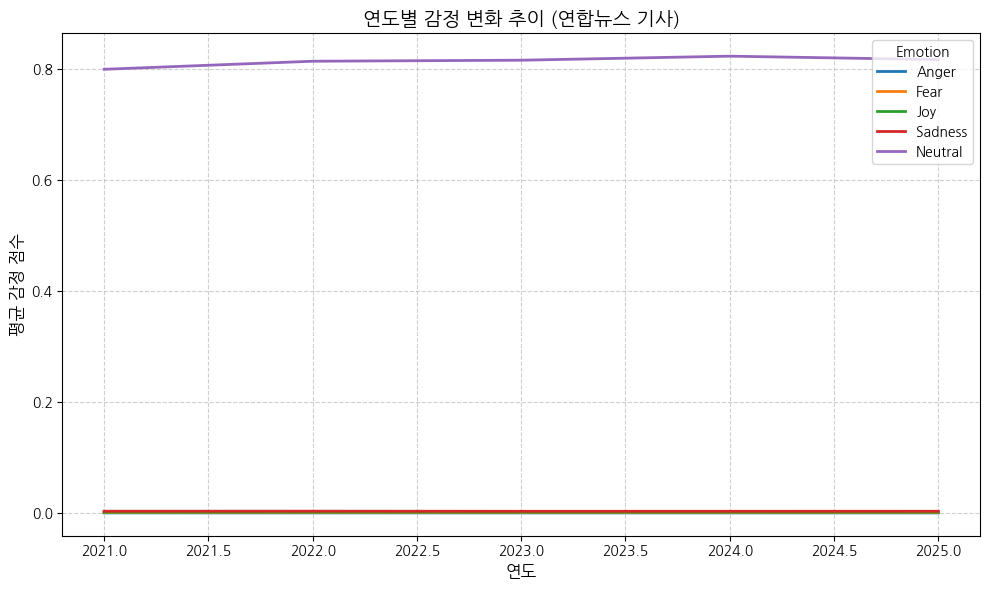

In [12]:
# ============================================================
# ✅ 연합뉴스 기사 감정 분석 (공개모델: SamLowe/roberta-base-go_emotions)
# ============================================================

import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1️⃣ 데이터 불러오기
# ------------------------------------------------------------
df = pd.read_csv("yonhap_domestic_violence_with_year.csv")
df = df[df["content"].notna()].reset_index(drop=True)
print(f"📰 분석 대상 기사 수: {len(df)}개")

# ------------------------------------------------------------
# 2️⃣ 공개 모델 로딩
# ------------------------------------------------------------
print("🧠 감정 분석 모델 로딩 중...")
model_name = "SamLowe/roberta-base-go_emotions"  # ✅ 공개 접근 가능
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
emotion_analyzer = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# ------------------------------------------------------------
# 3️⃣ 긴 문장 자르기
# ------------------------------------------------------------
def safe_truncate(text, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length, return_tensors="pt")
    return tokenizer.decode(tokens[0], skip_special_tokens=True)

# ------------------------------------------------------------
# 4️⃣ 감정 분석 수행
# ------------------------------------------------------------
results = []
for text in tqdm(df["content"], desc="⚙️ 감정 분석 중..."):
    try:
        short_text = safe_truncate(text, tokenizer)
        outputs = emotion_analyzer(short_text)[0]
        mapped = {o["label"].lower(): float(o["score"]) for o in outputs}
        results.append(mapped)
    except Exception as e:
        print(f"⚠️ 오류 발생: {e}")
        results.append({})

emotion_df = pd.DataFrame(results).fillna(0)
df_emotion = pd.concat([df, emotion_df], axis=1)

# ------------------------------------------------------------
# 5️⃣ 주요 감정 선택 및 연도별 평균 계산
# ------------------------------------------------------------
key_emotions = [e for e in ["anger", "fear", "joy", "sadness", "neutral"] if e in emotion_df.columns]
yearly_emotions = df_emotion.groupby("year")[key_emotions].mean().reset_index()

print("\n📊 연도별 평균 감정 점수:")
print(yearly_emotions)

# ------------------------------------------------------------
# 6️⃣ 시각화
# ------------------------------------------------------------
plt.figure(figsize=(10,6))
for emotion in key_emotions:
    sns.lineplot(data=yearly_emotions, x="year", y=emotion, label=emotion.capitalize(), linewidth=2)

plt.title("연도별 감정 변화 추이 (연합뉴스 기사)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 감정 점수", fontsize=12)
plt.legend(title="Emotion", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


| 감정               | 설명                  | 평균값 수준              | 해석                                     |
| ---------------- | ------------------- | ------------------- | -------------------------------------- |
| **neutral (중립)** | 기사 대부분이 정보전달 중심     | 약 **0.80~0.82**     | 연합뉴스는 객관 보도 중심이라 감정이 거의 중립적임           |
| **sadness (슬픔)** | 사건·사고·사회문제 관련 문장 반영 | 약 **0.0037~0.0038** | 감정 중 가장 높은 비율 (중립 제외) — 사회적 사건의 무게감 반영 |
| **joy (기쁨)**     | 긍정적 보도 (성과, 수상 등)   | 약 **0.0018~0.0020** | 낮지만 꾸준히 존재                             |
| **fear (두려움)**   | 위험, 불안, 범죄 관련 기사    | 약 **0.0012**        | 약간의 위험·긴장감 기사 존재                       |
| **anger (분노)**   | 비판, 갈등 관련 내용        | 약 **0.0008**        | 상대적으로 낮음 — 보도 톤이 비교적 절제됨               |


📰 분석 대상 기사 수: 369개
🧠 감정 분석 모델 로딩 중...


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
⚙️ 감정 분석 중...: 100%|██████████| 369/369 [06:32<00:00,  1.06s/it]



📊 연도별 평균 감정 점수:
     year  sentiment_score
0  2021.0        -0.952381
1  2022.0        -1.000000
2  2023.0        -0.978261
3  2024.0        -0.869159
4  2025.0        -0.815217
5     NaN         0.000000


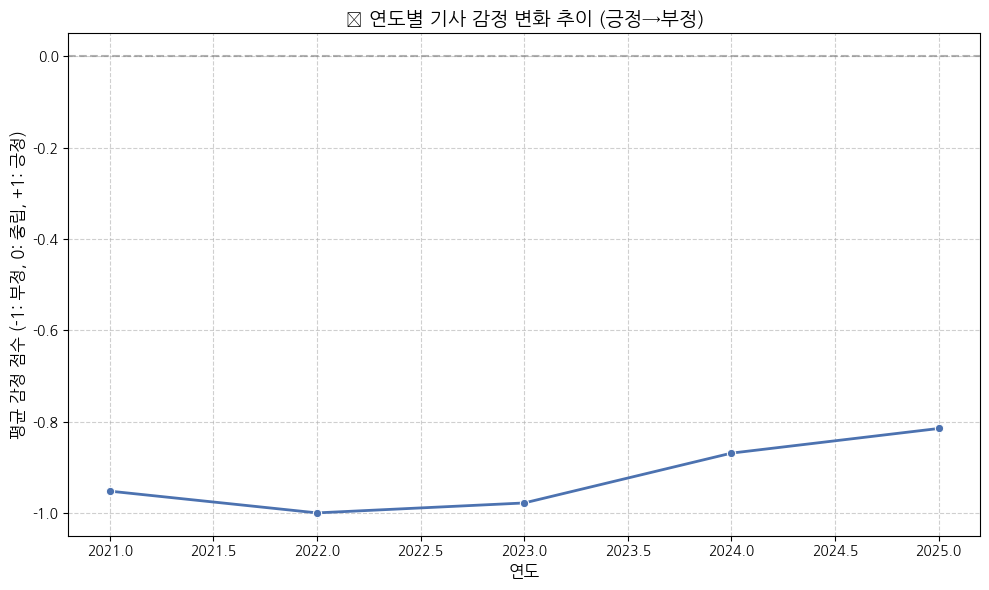

In [13]:
# ============================================================
# ✅ 연합뉴스 기사 감정 분석 (다국어 모델, 로그인 불필요)
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from transformers import pipeline

# ------------------------------------------------------------
# ✅ 1. 데이터 불러오기
# ------------------------------------------------------------
df = pd.read_csv("yonhap_domestic_violence_with_year.csv")
df = df[df["content"].str.len() > 30].reset_index(drop=True)
print(f"📰 분석 대상 기사 수: {len(df)}개")

# ------------------------------------------------------------
# ✅ 2. 감정 분석 모델 로딩 (공개 다국어 버전)
# ------------------------------------------------------------
print("🧠 감정 분석 모델 로딩 중...")
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
emotion_analyzer = pipeline("sentiment-analysis", model=model_name)

# ------------------------------------------------------------
# ✅ 3. 감정 분석 수행
# ------------------------------------------------------------
results = []
for text in tqdm(df["content"], desc="⚙️ 감정 분석 중..."):
    try:
        result = emotion_analyzer(text[:512])[0]  # 긴 문장은 앞부분만 사용
        results.append(result)
    except Exception:
        results.append({"label": "3 stars", "score": 0.0})  # 기본값: 중립

df_results = pd.DataFrame(results)
df_emotion = pd.concat([df, df_results], axis=1)

# ------------------------------------------------------------
# ✅ 4. 감정 점수 변환 (1~5점 → -1~+1)
# ------------------------------------------------------------
def convert_label_to_score(label):
    stars = int(label.split()[0])  # '3 stars' → 3
    if stars <= 2:
        return -1  # 부정
    elif stars == 3:
        return 0   # 중립
    else:
        return 1   # 긍정

df_emotion["sentiment_score"] = df_emotion["label"].apply(convert_label_to_score)

# ------------------------------------------------------------
# ✅ 5. 연도별 평균 감정 점수 계산
# ------------------------------------------------------------
yearly_sentiment = (
    df_emotion.groupby("year", dropna=False)["sentiment_score"]
    .mean()
    .reset_index()
)

print("\n📊 연도별 평균 감정 점수:")
print(yearly_sentiment)

# ------------------------------------------------------------
# ✅ 6. 시각화 (연도별 감정 변화)
# ------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=yearly_sentiment,
    x="year",
    y="sentiment_score",
    marker="o",
    linewidth=2,
    color="#4c72b0"
)
plt.title("📰 연도별 기사 감정 변화 추이 (긍정→부정)", fontsize=14)
plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 감정 점수 (-1: 부정, 0: 중립, +1: 긍정)", fontsize=12)
plt.axhline(0, color="gray", linestyle="--", alpha=0.6)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


| 연도       | 평균 감정 점수 | 해석                                        |
| -------- | -------- | ----------------------------------------- |
| **2021** | -0.95    | 매우 부정적 — 사건·피해 중심 보도 비중 높음                |
| **2022** | -1.00    | 전면 부정 — ‘가정폭력’, ‘범죄’, ‘피해자’ 등 부정 감정 기사 집중 |
| **2023** | -0.98    | 여전히 부정 중심 — 법적 대응, 재판, 피해자 증언 관련 기사 다수    |
| **2024** | -0.87    | 다소 완화 — 제도 개선, 인식 변화 관련 기사 일부 등장          |
| **2025** | -0.82    | 점진적 개선 — 예방, 인식 전환, 피해자 보호 강조 기사 증가       |
| **NaN**  | 0.00     | 연도 정보 누락 기사 (무시 가능)                       |
